In [1]:
using GenLAProblems
using LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, Random, Symbolics

Random.seed!(113312);

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Linear Algebra Problems: Computation and Output Rendering</strong>
</div>

# 0. Markdown

<details open>
  <summary>Collapsable Markdown, open by default</summary>

  ### Heading
  1. Foo
  2. Bar
     * Baz
     * Qux

  ### Some Javascript
  ```js
  function logSomething(something) {
    console.log('Something', something);
  }
  ```

  <summary><i>Wow, so fancy</i></summary>
  <b>WOW, SO BOLD</b>

</details>

# 1. NumPy, Latex Representations and Rounding

## Using Latexify for Printing

In [2]:
println("L string: Combine text and latex expressions")
A = [1 -2; 3 122]
L"\;\;\text{We define the matrix } A = %$(latexify(A, adjustment=:r, transpose=true, arraystyle=:round))"

L string: Combine text and latex expressions


L"$\;\;\text{We define the matrix } A = \begin{equation}
\left(
\begin{array}{rr}
1 & 3 \\
-2 & 122 \\
\end{array}
\right)
\end{equation}
$"

In [3]:
println("HTML: Wrap the text in a div")

A=[1 -2; 3 122]
latex_string = L"\;\;\text{We define the matrix } \quad A = %$(latexify(A))"
html_string  = """<div style="text-align: left;padding-left:1cm;">$latex_string</div>"""

# Display the HTML string
display("text/html", html_string)

HTML: Wrap the text in a div


$\;\;\text{We define the matrix } \quad A = \begin{equation}
\left[
\begin{array}{cc}
1 & -2 \\
3 & 122 \\
\end{array}
\right]
\end{equation}
$

In [4]:
A=[1 -2; 3 122]
L1 = L"\;\;\text{We define the matrix }\;\; A = %$(latexify(A))"
L2 = L"B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}"
sep = L"\quad \text{and} \;\;"
display(L"L string: Concatenation test: %$(L1), %$(sep)  %$(L2)")

L"L string: Concatenation test: $\;\;\text{We define the matrix }\;\; A = \begin{equation}
\left[
\begin{array}{cc}
1 & -2 \\
3 & 122 \\
\end{array}
\right]
\end{equation}
$, $\quad \text{and} \;\;$  $B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}$"

In [5]:
# Print out a definition of an integer array for use with numpy
A = [ 1 2 1; -1 1 2]
print_np_array_def(A)

"A = np.array([\n[1, 2, 1],\n[-1, 1, 2]\n])"

In [6]:
matrices=[[ [1 2; 2 1], :none], [:none]]
latexify( apply_function( x -> x^2, matrices) )

L"$\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1 & 4 \\
4 & 1 \\
\end{array}
\right] \\
 \\
\end{array}
\right] \\
\left[
\begin{array}{c}
 \\
\end{array}
\right] \\
\end{array}
\right]$"

In [7]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]], [["alpha" "b"], [1.1 π] ] ]
println( apply_function( x->to_latex(x), matrices ))

[[["1" "2"; "2" "1"], ["1" "2"; "-\\frac{3}{5}" "-1"]], [["\\text{alpha}" "\\text{b}"], ["1.1" "3.141592653589793"]]]


In [8]:
to_latex( -1//2), to_latex(2+1//2im)

("-\\frac{1}{2}", "2-\\frac{1}{2}\\mathit{i}")

In [9]:
factor_out_denominator( [1//2 1//3; 2//1 1//(-3) ])

(6, [3 2; 12 -2])

In [10]:
round_value( 2.3, 0), round_value(1//3, 3), round_value( Complex(1//3, -1//5),0), round_value( Complex(1//3, -1//5), 1), round_value( Complex(0, -1//5), 1)

(2, 0.333, 0 + 0im, 0.3 - 0.2im, 0.0 - 0.2im)

In [11]:
res = round_value( Complex(0,-1//5), 1)
to_latex(res)

"-0.2\\mathit{i}"

In [12]:
matrices = [ [[1 2; 2 1], [1//1 2; (-3)//5 -1]] ]
stack = apply_function( x->Complex(x+1//3, 1//5), matrices)
latexify( round_matrices(stack,1) )

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{c}
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
2.3+0.2\mathit{i} & 1.3+0.2\mathit{i} \\
\end{array}
\right] \\
\left[
\begin{array}{cc}
1.3+0.2\mathit{i} & 2.3+0.2\mathit{i} \\
-0.3+0.2\mathit{i} & -0.7+0.2\mathit{i} \\
\end{array}
\right] \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [13]:
m=latexify(stack[1][1])
println(m)
m

\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}



L"\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}
"

## Improvement: use LAlatex L_show/l_show for Printing

In [14]:
# use the l_show utility
display(l_show(m))
l_show(set( matrices[1]...,stack[1]..., arraystyle=:parray, separator=L",\quad "))

L"$\begin{equation}
\left[
\begin{array}{cc}
\frac{4}{3}+\frac{1}{5}\mathit{i} & \frac{7}{3}+\frac{1}{5}\mathit{i} \\
\frac{7}{3}+\frac{1}{5}\mathit{i} & \frac{4}{3}+\frac{1}{5}\mathit{i} \\
\end{array}
\right]
\end{equation}$
"

L"$\left\{ \left(\begin{array}{rr}
1 & 2 \\
2 & 1 \\
\end{array}\right) ,\quad \frac{1}{5} \left(\begin{array}{rr}
5 & 10 \\
-3 & -5 \\
\end{array}\right) ,\quad \frac{1}{15} \left(\begin{array}{rr}
20+3\mathit{i} & 35+3\mathit{i} \\
35+3\mathit{i} & 20+3\mathit{i} \\
\end{array}\right) ,\quad \frac{1}{15} \left(\begin{array}{rr}
20+3\mathit{i} & 35+3\mathit{i} \\
-4+3\mathit{i} & -10+3\mathit{i} \\
\end{array}\right) \right\}$
"

# 2. GE, GJ Type Problems

## 2.1. Generate Different Types of Matrices

In [15]:
# unit lower triangular matrix
Random.seed!(3)
l_show( L"\;\;\text{unit lower triangular matrix: \quad }", unit_lower(3,4; maxint=4) )

L"$\;\;\text{unit lower triangular matrix: \quad } \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
4 & 4 & 1 & 0 \\
\end{array}\right)$
"

In [16]:
# lower triangilar matrix
Random.seed!(23)
l_show( L"\text{lower triangular matrix} \qquad ", lower(3))

L"$\text{lower triangular matrix} \qquad \left(\begin{array}{rrr}
-3 & 0 & 0 \\
1 & 1 & 0 \\
1 & 2 & 3 \\
\end{array}\right)$
"

In [17]:
# reduced row echelon form matrix of given rank, with and without zero values to the right of pivots
Random.seed!(13221)
mat,pivot_cols = rref_matrix(4,10,3; maxint=5, pivot_in_first_col=false, has_zeros=false)
println("pivot cols: $pivot_cols")
l_show( L"\text{RREF} \qquad ", mat,
       per_element_style = (x,i,j,s) -> rowechelon_formatter(x, i, j, s; pivots=pivot_cols ))

pivot cols: [2, 6, 9]


"\$\\text{RREF} \\qquad \\left(\\begin{array}{rrrrrrrrrr}\n0 & \\textcolor{red}{\\boldsymbol{1}} & \\textcolor{red}{\\boldsymbol{-5}} & \\textcolor{red}{\\boldsymbol{-2}} & \\textcolor{red}{\\boldsymbol{5}} & \\textcolor{red}{\\boldsymbol{0}} & \\textcolor{red}{\\boldsymbol{-4}} & \\textcol" ⋯ 182 bytes ⋯ "} & \\textcolor{red}{\\boldsymbol{-5}} & \\textcolor{red}{\\boldsymbol{0}} & \\textcolor{red}{\\boldsymbol{4}} \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\textcolor{red}{\\boldsymbol{1}} & \\textcolor{red}{\\boldsymbol{3}} \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\\right)\$\n"

In [18]:
Random.seed!(1212)
l_show( L"\text{Symmetric matrix: }\qquad ", symmetric_matrix(4;maxint=9, with_zeros=true))

L"$\text{Symmetric matrix: }\qquad \left(\begin{array}{rrrr}
7 & -1 & -2 & 7 \\
-1 & -4 & -4 & -4 \\
-2 & -4 & -7 & 0 \\
7 & -4 & 0 & -5 \\
\end{array}\right)$
"

In [19]:
Random.seed!(1212)
#L"\text{Skew symmetric matrix: } \qquad %$(latexify(skew_symmetric_matrix(4;maxint=9, with_zeros=true), adjustment=:r))"
l_show("Skew symmetric matrix: \\quad", skew_symmetric_matrix(4;maxint=9, with_zeros=true))

L"$\text{Skew symmetric matrix: \quad} \left(\begin{array}{rrrr}
0 & 1 & 2 & -7 \\
-1 & 0 & 4 & 4 \\
-2 & -4 & 0 & 0 \\
7 & -4 & 0 & 0 \\
\end{array}\right)$
"

In [20]:
Random.seed!(44372)
L"\text{Elimination Matrix:} \qquad %$(latexify(i_with_onecol(6, 2; maxint=9, with_zeros=true ), adjustment=:r))"

L"$\text{Elimination Matrix:} \qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & -9 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 0 & 1 & 0 \\
0 & -3 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

In [21]:
Random.seed!(44372)
L"\text{Elimination Matrix, no zeros:}\qquad %$(latexify(i_with_onecol(6, 3; maxint=9, with_zeros=false,upper=false ), adjustment=:r))"

L"$\text{Elimination Matrix, no zeros:}\qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & -9 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 & 1 & 0 \\
0 & 0 & 2 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

In [22]:
Random.seed!(44372)
L"\text{Elimination Matrix, upper:}\qquad %$(latexify(i_with_onecol(6, 4; maxint=9, with_zeros=false,lower=false ), adjustment=:r))"

L"$\text{Elimination Matrix, upper:}\qquad \begin{equation}
\left[
\begin{array}{rrrrrr}
1 & 0 & 0 & -9 & 0 & 0 \\
0 & 1 & 0 & -1 & 0 & 0 \\
0 & 0 & 1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
$"

## 2.2 Generating GE and GJ Type Problems

In [23]:
Random.seed!(416)
pivot_cols,A = gen_gj_matrix(5,4,2;maxint=2,pivot_in_first_col=true, has_zeros=true)
lp=L"\text{pivot columns: } %$(latexify( pivot_cols)')"
la=L"\quad A=%$(latexify(A, adjustment=:r))"
L"%$(lp), %$(la)" 

L"$\text{pivot columns: } \begin{equation}
\left[
\begin{array}{c}
1 \\
3 \\
\end{array}
\right]
\end{equation}
$, $\quad A=\begin{equation}
\left[
\begin{array}{rrrr}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}
\right]
\end{equation}
$"

In [24]:
X,B=gen_rhs(A,pivot_cols; maxint=2,num_rhs=2,has_zeros=false)
l_show( A, X, " = ", B)

L"$\left(\begin{array}{rrrr}
2 & 2 & 4 & -3 \\
-2 & -2 & -6 & 4 \\
-4 & -4 & -4 & 4 \\
0 & 0 & 2 & -1 \\
4 & 4 & 10 & -7 \\
\end{array}\right) \left(\begin{array}{rr}
2 & -2 \\
0 & 0 \\
-1 & 2 \\
0 & 0 \\
\end{array}\right) = \left(\begin{array}{rr}
0 & 4 \\
2 & -8 \\
-4 & 0 \\
-2 & 4 \\
-2 & 12 \\
\end{array}\right)$
"

In [25]:
Random.seed!(41283)
A,X,B=gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
l_show( "[A B] X: ", [A B], X)

L"$\text{[A B] X: } \left(\begin{array}{rrrrrrrr}
0 & 1 & -2 & 2 & 3 & 1 & 3 & 0 \\
0 & -2 & 3 & -2 & -5 & -1 & -5 & 1 \\
0 & 2 & -4 & 4 & 6 & 2 & 6 & 0 \\
\end{array}\right) \left(\begin{array}{rr}
0 & 0 \\
1 & -2 \\
-1 & -1 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{array}\right)$
"

In [26]:
Random.seed!(41299)
pivot_cols,L,U,A=gen_lu_pb(4,6,3)
l_show( "pivot_cols = ", pivot_cols', " A = ", A)

L"$\text{pivot\_cols = } \left(\begin{array}{rrr}
1 & 2 & 4 \\
\end{array}\right) \text{ A = } \left(\begin{array}{rrrrrr}
-1 & -1 & 2 & 2 & 0 & -2 \\
1 & 4 & -8 & -8 & -12 & 5 \\
-3 & -3 & 6 & 5 & 4 & -8 \\
2 & 8 & -16 & -15 & -28 & 12 \\
\end{array}\right)$
"

In [27]:
Random.seed!(41299)
pivot_cols,P,L,U,A=gen_plu_pb(5,7,3)
display(L"\text{pivot cols: } %$(pivot_cols)")
l_show(  A, " = ", P, L, U)

L"$\text{pivot cols: } [1, 2, 4]$"

"\$\\left(\\begin{array}{rrrrrrr}\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 1 & 3 & -2 & -2 \\\\\n0 & 1 & 1 & 3 & 5 & -8 & -4 \\\\\n0 & -2 & -2 & 0 & 8 & 4 & -4 \\\\\n2 & 3 & -3 & -9 & -7 & 4 & 12 \\\\\n\\end{array}\\right) = \\left(\\begin{array}{rrrrr}\n0 & 0 & 0 & 0 & 1 \\\\\n0 & 0 & 1 & 0 & " ⋯ 171 bytes ⋯ " 0 \\\\\n0 & -2 & 6 & 1 & 0 \\\\\n0 & 0 & 0 & 0 & 1 \\\\\n\\end{array}\\right) \\left(\\begin{array}{rrrrrrr}\n2 & 3 & -3 & -9 & -7 & 4 & 12 \\\\\n0 & 1 & 1 & 3 & 5 & -8 & -4 \\\\\n0 & 0 & 0 & 1 & 3 & -2 & -2 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\\right)\$\n"

## 2.3 GE,GJ Solvers

#### <strong>GJ Problem</strong>

In [28]:
Random.seed!(41283)
A,X,B = gen_gj_pb(2,3,2; maxint=2, pivot_in_first_col=false, num_rhs=1,has_zeros=false)
matrices, pivot_cols = reduce_to_ref( [A B], gj=true )
RB  = matrices[end][end]
# R = RB[:,1:size(A,2)]; RHS=RB[:,size(A,2)+1:end]
println( "Particular Solution, aka xₚ")
X_p = Int.( particular_solution( RB, size(B,2), pivot_cols) )
l_show(L"x_p = ", X_p)

Particular Solution, aka xₚ


L"$x_p = \left(\begin{array}{r}
0 \\
2 \\
1 \\
\end{array}\right)$
"

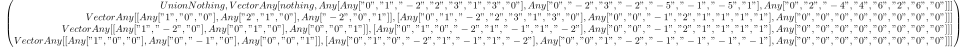

In [29]:
Random.seed!(41283)
A,X,B = gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
matrices, pivot_cols = reduce_to_ref( [A B], gj=true )

pivot_locs    = [(i-1,Int64(pivot_cols[i]-1)) for i in eachindex(pivot_cols)]
ref_path_list = [ [length(matrices)-1, 1, pivot_locs, "vh","red"] ]

h,m=nM.ge( to_latex(matrices), Nrhs=size(B,2),
     ref_path_list = ref_path_list, tmp_dir="../../tmp")
h

In [30]:
_,_, desc = reduce_to_ref( [A B], gj=true )
desc

9-element Vector{Any}:
 GenLAProblems.FoundPivot(0, 1, 1, 2, 1, [2])
 GenLAProblems.RequireElimination(0, true, true, 1, 2, 1, [2])
 GenLAProblems.DoElimination(1, 1, 2, true)
 GenLAProblems.FoundPivot(1, 2, 2, 3, 2, [2, 3])
 GenLAProblems.RequireElimination(1, true, true, 2, 3, 2, [2, 3])
 GenLAProblems.DoElimination(2, 2, 3, true)
 GenLAProblems.RequireScaling(2, [2, 3])
 GenLAProblems.DoScaling(3)
 GenLAProblems.Finished(3, [2, 3])

##### GJ problem details

In [31]:
println("Pivot Cols: $pivot_cols" )
RB  = matrices[end][end]
# R = RB[:,1:size(A,2)]; RHS=RB[:,size(A,2)+1:end]
println( "Particular Solution, aka Xₚ")
X_p = Int.( particular_solution( RB, size(B,2), pivot_cols) )
l_show(L"X_p =", X_p)

Pivot Cols: [2, 3]
Particular Solution, aka Xₚ


L"$X_p = \left(\begin{array}{rr}
0 & 0 \\
1 & -2 \\
-1 & -1 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{array}\right)$
"

In [32]:
println("Homogeneous Solution")
X_h = homogeneous_solutions( RB[:,1:size(A,2)], pivot_cols)
l_show(L"X_h = ", X_h)

Homogeneous Solution


L"$X_h = \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 2 & -1 & 1 \\
0 & 2 & 1 & 1 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [33]:
println("Particular Solution")
l_show(L"X_p = ", X)

Particular Solution


L"$X_p = \left(\begin{array}{rr}
0 & 0 \\
1 & -2 \\
-1 & -1 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{array}\right)$
"

In [34]:
to_latex(matrices)

4-element Vector{Vector}:
 Union{Nothing, Matrix{String}}[nothing, ["0" "1" … "3" "0"; "0" "-2" … "-5" "1"; "0" "2" … "6" "0"]]
 [["1" "0" "0"; "2" "1" "0"; "-2" "0" "1"], ["0" "1" … "3" "0"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "-2" "0"; "0" "1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "1" "1"; "0" "0" … "0" "0"]]
 [["1" "0" "0"; "0" "-1" "0"; "0" "0" "1"], ["0" "1" … "1" "-2"; "0" "0" … "-1" "-1"; "0" "0" … "0" "0"]]

#### <strong>Inverse Problem</strong>

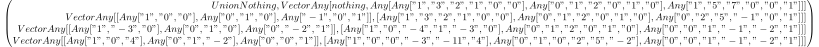

In [35]:
A, A_inv                = gen_inv_pb(3, maxint=3)
matrices, pivot_cols, _ = reduce_to_ref( Rational{Int64}.([A 1I]), gj=true)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=size(A,1), tmp_dir="../../tmp" )
h

#### **LU problem**

In [36]:
Random.seed!(5003)
m,n,r=4,6,3
pivot_cols, L,U, A = gen_lu_pb(m,n,r, maxint=3)
x,b                       = gen_rhs(A, pivot_cols)

matrices,pivot_cols,desc  = reduce_to_ref( [A b], n=n, gj=false )

pivot_list, bg_for_entries, ref_path_list, basic_var = decorate_ge(desc,pivot_cols,size(A); pivot_color="yellow!40");

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=1,
           fig_scale        = 1.3,
           pivot_list       = pivot_list, pivot_text_color="red", variable_colors=["red", "black"],
           bg_for_entries   = bg_for_entries,
           ref_path_list    = ref_path_list,
           variable_summary = basic_var,
           array_names=["E", ["A", "b"]],
           tmp_dir="../../tmp", keep_file="../../tmp/bah")
h

LoadError: Python: RenderError: Toolchain execution failed.
Artifacts kept at: ../../tmp/../../tmp.
See stderr at: ../../tmp/../../tmp/bah.stderr.txt
Last returncode: 12.
---- stderr tail ----
Latexmk: If appropriate, the -f option can be used to get latexmk
  to try to force complete processing.


---- latex log tail ----

      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.93 }
      %%
(That was another \errmessage.)


Overfull \hbox (15.0pt too wide) in paragraph at lines 56--95
[]$[]$ 
 []

[1

{/var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map}] (./bah.aux)

LaTeX Warning: Label(s) may have changed. Rerun to get cross-references right.

 ) 
Here is how much of TeX's memory you used:
 17331 strings out of 477975
 391322 string characters out of 5839281
 1869330 words of memory out of 5000000
 37224 multiletter control sequences out of 15000+600000
 512741 words of font info for 34 fonts, out of 8000000 for 9000
 59 hyphenation exceptions out of 8191
 77i,17n,83p,462b,1009s stack positions out of 10000i,1000n,20000p,200000b,200000s
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmex10.pfb></us
r/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb></usr/shar
e/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb></usr/share/texli
ve/texmf-dist/fonts/type1/public/amsfonts/cm/cmsy10.pfb>
Output written on bah.pdf (1 page, 41354 bytes).
PDF statistics:
 31 PDF objects out of 1000 (max. 8388607)
 19 compressed objects within 1 object stream
 0 named destinations out of 1000 (max. 500000)
 13 words of extra memory for PDF output out of 10000 (max. 10000000)


[0mPython stacktrace:
[0m [1] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[35mjupyter_tikz.executor [39m[90m/opt/ea42gh/jupyter-tikz/jupyter_tikz/executor.py:341[39m
[0m [2] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[36mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:71[39m
[0m [3] [0m[1mrender_svg[22m
[90m   @ [39m[36mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:108[39m
[0m [4] [0m[1mgrid_svg[22m
[90m   @ [39m[36mmatrixlayout.ge [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/ge.py:2965[39m
[0m [5] [0m[1mge[22m
[90m   @ [39m[32mla_figures.ge_convenience [39m[90m/opt/ea42gh/la_figures/la_figures/ge_convenience.py:1030[39m

#### **$LDL^t$ problem**

In [37]:
Random.seed!(4105)

L,D,A = gen_ldlt_pb(4)

matrices,_,desc  = reduce_to_ref( A )
pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,_ = nM.ge(to_latex(matrices), formater=x->x,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
            fig_scale      = 1.3,
            tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

LoadError: Python: RenderError: Toolchain execution failed.
Artifacts kept at: ../../tmp/../../tmp.
See stderr at: ../../tmp/../../tmp/foo.stderr.txt
Last returncode: 12.
---- stderr tail ----
Latexmk: If appropriate, the -f option can be used to get latexmk
  to try to force complete processing.


---- latex log tail ----

      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


Overfull \hbox (15.0pt too wide) in paragraph at lines 56--96
[]$[]$ 
 []

[1

{/var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map}] (./foo.aux)

LaTeX Warning: Label(s) may have changed. Rerun to get cross-references right.

 ) 
Here is how much of TeX's memory you used:
 17331 strings out of 477975
 391322 string characters out of 5839281
 1869330 words of memory out of 5000000
 37224 multiletter control sequences out of 15000+600000
 512741 words of font info for 34 fonts, out of 8000000 for 9000
 59 hyphenation exceptions out of 8191
 77i,17n,83p,462b,1009s stack positions out of 10000i,1000n,20000p,200000b,200000s
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmex10.pfb></us
r/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb></usr/shar
e/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb></usr/share/texli
ve/texmf-dist/fonts/type1/public/amsfonts/cm/cmsy10.pfb>
Output written on foo.pdf (1 page, 40773 bytes).
PDF statistics:
 31 PDF objects out of 1000 (max. 8388607)
 19 compressed objects within 1 object stream
 0 named destinations out of 1000 (max. 500000)
 13 words of extra memory for PDF output out of 10000 (max. 10000000)


[0mPython stacktrace:
[0m [1] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[32mjupyter_tikz.executor [39m[90m/opt/ea42gh/jupyter-tikz/jupyter_tikz/executor.py:341[39m
[0m [2] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[33mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:71[39m
[0m [3] [0m[1mrender_svg[22m
[90m   @ [39m[33mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:108[39m
[0m [4] [0m[1mgrid_svg[22m
[90m   @ [39m[33mmatrixlayout.ge [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/ge.py:2965[39m
[0m [5] [0m[1mge[22m
[90m   @ [39m[35mla_figures.ge_convenience [39m[90m/opt/ea42gh/la_figures/la_figures/ge_convenience.py:1030[39m

In [38]:
L = inv( matrices[2][1] )
for i in 3:length(matrices)  L *= inv( matrices[i][1] ) end
D = Diagonal(matrices[end][end])
LDLt = L*D*L'
l_show( L"L D L^t = A : \qquad", Int.(L),Int.(D), Int.(L)', L" = ", Int.(LDLt), inline=true )

L"$L D L^t = A : \qquad \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 \\
-1 & -1 & 1 & 0 \\
-3 & -2 & 3 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
3 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 2 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 1 & -1 & -3 \\
0 & 1 & -1 & -2 \\
0 & 0 & 1 & 3 \\
0 & 0 & 0 & 1 \\
\end{array}\right) = \left(\begin{array}{rrrr}
3 & 3 & -3 & -9 \\
3 & 4 & -4 & -11 \\
-3 & -4 & 5 & 14 \\
-9 & -11 & 14 & 42 \\
\end{array}\right)$
"

#### **Cholesky Decomposition**

In [39]:
Random.seed!(41325)

L,D,A            = gen_ldlt_pb(4)
matrices,_,desc  = reduce_to_ref( A )

pivot_list, bg_for_entries, ref_path_list = decorate_ge(desc,1:size(A,1),size(A))

h,m = nM.ge(to_latex(matrices), formater=x->x,
            fig_scale      = 1.3,
            pivot_list     = pivot_list,
            bg_for_entries = bg_for_entries,
            ref_path_list  = ref_path_list,
            tmp_dir="../../tmp", keep_file="../../tmp/foo")
h

LoadError: Python: RenderError: Toolchain execution failed.
Artifacts kept at: ../../tmp/../../tmp.
See stderr at: ../../tmp/../../tmp/foo.stderr.txt
Last returncode: 12.
---- stderr tail ----
Latexmk: If appropriate, the -f option can be used to get latexmk
  to try to force complete processing.


---- latex log tail ----

      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.94 }
      %%
(That was another \errmessage.)


Overfull \hbox (15.0pt too wide) in paragraph at lines 56--96
[]$[]$ 
 []

[1

{/var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map}] (./foo.aux)

LaTeX Warning: Label(s) may have changed. Rerun to get cross-references right.

 ) 
Here is how much of TeX's memory you used:
 17354 strings out of 477975
 391886 string characters out of 5839281
 1873330 words of memory out of 5000000
 37247 multiletter control sequences out of 15000+600000
 512741 words of font info for 34 fonts, out of 8000000 for 9000
 59 hyphenation exceptions out of 8191
 77i,17n,83p,462b,1009s stack positions out of 10000i,1000n,20000p,200000b,200000s
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmex10.pfb></us
r/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb></usr/shar
e/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb></usr/share/texli
ve/texmf-dist/fonts/type1/public/amsfonts/cm/cmsy10.pfb>
Output written on foo.pdf (1 page, 41565 bytes).
PDF statistics:
 31 PDF objects out of 1000 (max. 8388607)
 19 compressed objects within 1 object stream
 0 named destinations out of 1000 (max. 500000)
 13 words of extra memory for PDF output out of 10000 (max. 10000000)


[0mPython stacktrace:
[0m [1] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[35mjupyter_tikz.executor [39m[90m/opt/ea42gh/jupyter-tikz/jupyter_tikz/executor.py:341[39m
[0m [2] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[36mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:71[39m
[0m [3] [0m[1mrender_svg[22m
[90m   @ [39m[36mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:108[39m
[0m [4] [0m[1mgrid_svg[22m
[90m   @ [39m[36mmatrixlayout.ge [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/ge.py:2965[39m
[0m [5] [0m[1mge[22m
[90m   @ [39m[32mla_figures.ge_convenience [39m[90m/opt/ea42gh/la_figures/la_figures/ge_convenience.py:1030[39m

In [40]:
D     = Diagonal(matrices[end][end])
sqrtD = sympy.sqrt.(sympy.Rational.(D))
G     = sympy.Matrix(sqrtD * L')
GtG   = G'*G


LoadError: MethodError: no method matching zero(::PythonCall.Py)

[0mClosest candidates are:
[0m  zero([91m::Type{Union{}}[39m, Any...)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:310[24m[39m
[0m  zero([91m::Type{LibGit2.GitHash}[39m)
[0m[90m   @[39m [36mLibGit2[39m [90m/usr/local/julia/share/julia/stdlib/v1.10/LibGit2/src/[39m[90m[4moid.jl:221[24m[39m
[0m  zero([91m::Type{Dates.Date}[39m)
[0m[90m   @[39m [32mDates[39m [90m/usr/local/julia/share/julia/stdlib/v1.10/Dates/src/[39m[90m[4mtypes.jl:439[24m[39m
[0m  ...


In [41]:
typeof(sympy.Matrix(L)) #*sqrtD #* sqrtD*sympy.Matrix(L')

PythonCall.Py

#### **PLU Problem**

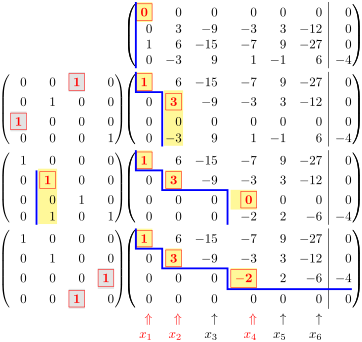

In [42]:
#Random.seed!(4208)
pivot_cols,P,L,U,A        = gen_plu_pb(4,6,3)
x,b                       = gen_rhs(A, pivot_cols)
#print(L_show(b, arraystyle=:curlyarray))

pb = ShowGe{Rational{Int}}( A,  b, tmp_dir="../../tmp")
ref!(pb)
show_layout!(pb, fig_scale=1.3)

#### New Interface

In [43]:
Random.seed!(323);
A,X,B = gen_gj_pb(2,3,2; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
pb = ShowGe{Rational{Int}}( A,  B, tmp_dir="../../tmp")

show_system( pb, b_col=2 )

/opt/ea42gh/la_figures/la_figures/_sympy_utils.py:130: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sym.Matrix(jl_list)


LoadError: Python: ValueError: rhs must be a vector; got shape (2, 2)
[0mPython stacktrace:
[0m [1] [0m[1mto_sympy_col[22m
[90m   @ [39m[35mla_figures._sympy_utils [39m[90m/opt/ea42gh/la_figures/la_figures/_sympy_utils.py:191[39m
[0m [2] [0m[1mlinear_system_tex[22m
[90m   @ [39m[35mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:166[39m

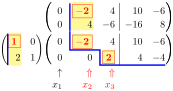

In [44]:
ref!(pb)
show_layout!(pb)

In [45]:
#create_cascade!(pb, b_col=2)
show_backsubstitution!(pb, b_col=1)

/opt/ea42gh/la_figures/la_figures/_sympy_utils.py:130: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sym.Matrix(jl_list)


LoadError: Python: AttributeError: 'Tuple' object has no attribute 'equals'
[0mPython stacktrace:
[0m [1] [0m[1m_find_reasonable_pivot[22m
[90m   @ [39m[35msympy.matrices.determinant [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/determinant.py:104[39m
[0m [2] [0m[1m_row_reduce_list[22m
[90m   @ [39m[35msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:68[39m
[0m [3] [0m[1m_row_reduce[22m
[90m   @ [39m[35msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:127[39m
[0m [4] [0m[1m_rref[22m
[90m   @ [39m[35msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:381[39m
[0m [5] [0m[1mrref[22m
[90m   @ [39m[35msympy.matrices.matrixbase [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/matrixbase.py:3139[39m
[0m [6] [0m[1m_backsub_trace_from_ref[22m
[90m   @ [39m[36mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:99[39m
[0m [7] [0m[1mbacksubstitution_tex[22m
[90m   @ [39m[36mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:149[39m

In [46]:
show_solution!(pb, b_col=1)

LoadError: Python: AttributeError: 'Tuple' object has no attribute 'equals'
[0mPython stacktrace:
[0m [1] [0m[1m_find_reasonable_pivot[22m
[90m   @ [39m[36msympy.matrices.determinant [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/determinant.py:104[39m
[0m [2] [0m[1m_row_reduce_list[22m
[90m   @ [39m[36msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:68[39m
[0m [3] [0m[1m_row_reduce[22m
[90m   @ [39m[36msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:127[39m
[0m [4] [0m[1m_rref[22m
[90m   @ [39m[36msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:381[39m
[0m [5] [0m[1mrref[22m
[90m   @ [39m[36msympy.matrices.matrixbase [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/matrixbase.py:3139[39m
[0m [6] [0m[1mstandard_solution_tex[22m
[90m   @ [39m[32mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:224[39m

In [47]:
Xp, Xh = solutions(pb)
l_show( L"B =", pb.B, L"\quad x_p =", Xp, L"\quad x_h = ", Xh)

L"$B = \left(\begin{array}{rr}
10 & -6 \\
-16 & 8 \\
\end{array}\right) \quad x_p = \left(\begin{array}{rr}
0 & 0 \\
-1 & -1 \\
2 & -2 \\
\end{array}\right) \quad x_h = \left(\begin{array}{r}
1 \\
0 \\
0 \\
\end{array}\right)$
"

In [48]:
#form_linear_combination(symbol_vector(L"\alpha", pb.free_cols), Xh)

##### forward/backward

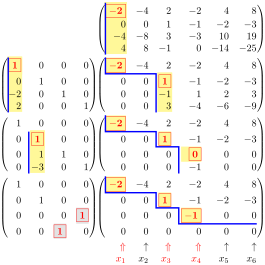

In [49]:
A₁=[-2 -4 2 -2 4 8; 0 0 1 -1 -2 -3; -4 -8 3 -3 10 19; 4 8 -1 0 -14 -25]
pb₁ = ShowGe{Rational{Int}}(A₁)
ref!(pb₁)
show_layout!(pb₁)

In [50]:
P₁      = pb₁.matrices[end][1]
inv_E₁₁ = inv(pb₁.matrices[2][1])
inv_E₁₂ = inv(pb₁.matrices[3][1])
U₁      = pb₁.matrices[end][end]

L₁ = P₁ * inv_E₁₁ * inv_E₁₂ * P₁
l_show("A = ", inv_E₁₁, inv_E₁₂, P₁, U₁ )

L"$\text{A = } \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
2 & 0 & 1 & 0 \\
-2 & 0 & 0 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
0 & 3 & 0 & 1 \\
\end{array}\right) \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{array}\right) \left(\begin{array}{rrrrrr}
-2 & -4 & 2 & -2 & 4 & 8 \\
0 & 0 & 1 & -1 & -2 & -3 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}\right)$
"

In [51]:
b₁ = [4;0;8;-9]
w₁ = P₁' * b₁
l_show( L"P w = b\;\;:\qquad P = ", P₁, L",\;\;b = ", b₁, L"\quad w = ", w₁ )

L"$P w = b\;\;:\qquad P = \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{array}\right) ,\;\;b = \left(\begin{array}{r}
4 \\
0 \\
8 \\
-9 \\
\end{array}\right) \quad w = \left(\begin{array}{r}
4 \\
0 \\
-9 \\
8 \\
\end{array}\right)$
"

In [52]:
display(l_show( L₁, w₁))
show_forwardsubstitution(L₁,w₁; var_name="y")

L"$\left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
-2 & 3 & 1 & 0 \\
2 & -1 & 0 & 1 \\
\end{array}\right) \left(\begin{array}{r}
4 \\
0 \\
-9 \\
8 \\
\end{array}\right)$
"

/opt/ea42gh/la_figures/la_figures/_sympy_utils.py:130: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sym.Matrix(jl_list)


LoadError: Python: ValueError: rhs must be a vector; got shape (4, 2)
[0mPython stacktrace:
[0m [1] [0m[1mto_sympy_col[22m
[90m   @ [39m[32mla_figures._sympy_utils [39m[90m/opt/ea42gh/la_figures/la_figures/_sympy_utils.py:191[39m
[0m [2] [0m[1m_backsub_trace_from_ref[22m
[90m   @ [39m[32mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:92[39m
[0m [3] [0m[1mbacksubstitution_tex[22m
[90m   @ [39m[32mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:149[39m

In [53]:
typeof(w₁)

Vector{Rational{Int64}} (alias for Array{Rational{Int64}, 1})

# 3. Normal Equation, QR Type Problems

## 3.1 Orthogonal Matrices

In [54]:
Random.seed!(27)

c,mat = W_2_matrix()
l_show( L"\qquad A = ", mat, L", \qquad A^T A = ", mat'mat)

L"$\qquad A = \left(\begin{array}{rr}
5 & -12 \\
12 & 5 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rr}
169 & 0 \\
0 & 169 \\
\end{array}\right)$
"

In [55]:
Random.seed!(27)

m=Q_2_matrix()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A = \frac{1}{13} \left(\begin{array}{rr}
5 & -12 \\
12 & 5 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rr}
1 & 0 \\
0 & 1 \\
\end{array}\right)$
"

In [56]:
Random.seed!(28)
c,m=W_3_matrix()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A = \left(\begin{array}{rrr}
-2 & 0 & 0 \\
0 & 15 & -112 \\
0 & 112 & 15 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrr}
4 & 0 & 0 \\
0 & 12769 & 0 \\
0 & 0 & 12769 \\
\end{array}\right)$
"

In [57]:
Random.seed!(28)
m = Q_3_matrix()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A = \frac{1}{113} \left(\begin{array}{rrr}
0 & -112 & 15 \\
0 & 15 & 112 \\
113 & 0 & 0 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}\right)$
"

In [58]:
Random.seed!(28)
m = Q_4_blocks()
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A = \frac{1}{2825} \left(\begin{array}{rrrr}
2712 & 0 & 0 & 791 \\
791 & 0 & 0 & -2712 \\
0 & -2800 & 375 & 0 \\
0 & 375 & 2800 & 0 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [59]:
Random.seed!(288)
c,m,den = W_4_matrix()
l_show( L"\qquad A = ",1//c,  m, L", \qquad A^T A = ", m'm//(c*c))

L"$\qquad A = \frac{1}{23} \left(\begin{array}{rrrr}
13 & 6 & 0 & 18 \\
-18 & 0 & 6 & 13 \\
0 & -18 & -13 & 6 \\
6 & -13 & 18 & 0 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [60]:
Random.seed!(388)
m=Q_4_matrix()

l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A = \frac{1}{27} \left(\begin{array}{rrrr}
2 & 10 & 0 & 25 \\
-25 & 0 & -10 & 2 \\
0 & -25 & 2 & 10 \\
-10 & 2 & 25 & 0 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [61]:
Random.seed!(388)
m4=Q_matrix(4)
m5=Q_matrix(5)

display( l_show( L"\qquad A_4 = ", m4, L", \qquad\qquad\qquad A_4^T A_4 = ", m4'm4))
display( l_show( L"\qquad A_5 = ", m5, L", \qquad A_5^T A_5 = ", m5'm5))

L"$\qquad A_4 = \frac{1}{129} \left(\begin{array}{rrrr}
115 & -18 & 44 & 34 \\
34 & 99 & -70 & 28 \\
-44 & 54 & 83 & 70 \\
-18 & -60 & -54 & 99 \\
\end{array}\right) , \qquad\qquad\qquad A_4^T A_4 = \left(\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}\right)$
"

L"$\qquad A_5 = \frac{1}{203} \left(\begin{array}{rrrrr}
72 & -97 & 20 & 146 & 70 \\
-15 & 164 & -38 & 88 & 70 \\
-54 & 22 & 188 & -8 & 49 \\
180 & 62 & 50 & -41 & -28 \\
22 & -24 & -39 & -102 & 168 \\
\end{array}\right) , \qquad A_5^T A_5 = \left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [62]:
Random.seed!(388)
m=sparse_Q_matrix((1,1,3))
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A = \frac{1}{23} \left(\begin{array}{rrrrr}
3 & 0 & 14 & 0 & -18 \\
-6 & 0 & 18 & 0 & 13 \\
0 & 0 & 0 & -23 & 0 \\
0 & -23 & 0 & 0 & 0 \\
22 & 0 & 3 & 0 & 6 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [63]:
Random.seed!(388)
c,m=sparse_W_matrix((1,1,3))
l_show( L"\qquad A = ", 1//c, m, L", \qquad A^T A = ", m'm//(c*c))

L"$\qquad A = \frac{1}{23} \left(\begin{array}{rrrrr}
3 & 0 & 14 & 0 & -18 \\
-6 & 0 & 18 & 0 & 13 \\
0 & 0 & 0 & -23 & 0 \\
0 & -23 & 0 & 0 & 0 \\
22 & 0 & 3 & 0 & 6 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}\right)$
"

In [64]:
Random.seed!(388)
m = W_matrix(5)
l_show( L"\qquad A = ", m, L", \qquad A^T A = ", m'm)

L"$\qquad A = \left(\begin{array}{rrrrr}
16 & -11 & 38 & -18 & -8 \\
9 & 32 & -8 & -16 & -28 \\
8 & 18 & 19 & 38 & -4 \\
-28 & -16 & 4 & 8 & -33 \\
-32 & 22 & 18 & -11 & 16 \\
\end{array}\right) , \qquad A^T A = \left(\begin{array}{rrrrr}
2209 & 0 & 0 & 0 & 0 \\
0 & 2209 & 0 & 0 & 0 \\
0 & 0 & 2209 & 0 & 0 \\
0 & 0 & 0 & 2209 & 0 \\
0 & 0 & 0 & 0 & 2209 \\
\end{array}\right)$
"

## 3.2 Normal Equation and QR Problems

### 3.2.1 Projection Matrix

In [65]:
A =  gen_full_col_rank_matrix( (1,1,2),3; maxint=2 )
P =  ca_projection_matrix( A )

l_show( L"\qquad A = ", A, L",\qquad P = ", P)

L"$\qquad A = \frac{1}{5} \left(\begin{array}{rrr}
-1 & 0 & 4 \\
-5 & 10 & 5 \\
-7 & 0 & 3 \\
0 & -10 & 0 \\
\end{array}\right) ,\qquad P = \frac{1}{75} \left(\begin{array}{rrrr}
59 & 20 & -12 & 20 \\
20 & 50 & 15 & -25 \\
-12 & 15 & 66 & 15 \\
20 & -25 & 15 & 50 \\
\end{array}\right)$
"

In [66]:
A3 = gen_qr_problem_3(maxint=2)
A4 = gen_qr_problem_4(maxint=2)
B4 = gen_qr_problem(4;maxint=2)
display(l_show( L"\qquad A_3 = ", A3, L", \qquad A_4 = ", A4, L", \qquad B_4 = ", B4  ))
l_show( L"\qquad P_3 = ", ca_projection_matrix(Rational{Int}.( A3 )))

L"$\qquad A_3 = \left(\begin{array}{rrr}
0 & 0 & 2 \\
15 & -127 & 209 \\
112 & -97 & -142 \\
\end{array}\right) , \qquad A_4 = \left(\begin{array}{rrrr}
6 & -9 & -9 & -19 \\
0 & 22 & 16 & -19 \\
22 & -44 & -41 & 28 \\
3 & -12 & -34 & 9 \\
\end{array}\right) , \qquad B_4 = \left(\begin{array}{rrrr}
1 & 3 & -1 & -2 \\
1 & 3 & -3 & 0 \\
1 & 1 & 1 & -6 \\
1 & 1 & -1 & 0 \\
\end{array}\right)$
"

L"$\qquad P_3 = \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}\right)$
"

### 3.2.2 QR Problems

In [67]:
A=[3 1; 4 2]
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

Python: '<'

In [68]:
A   = gen_qr_problem_3(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp")
h

Python: '<'

In [69]:
A   = gen_qr_problem_4(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../../tmp", fig_scale=0.9)
h

Python: '<'

In [70]:
A   = gen_qr_problem(8, maxint=1)
W   = gram_schmidt_w(A[:,1:3])
h,m = nM.gram_schmidt_qr(A[:,1:3], W, fig_scale=0.8, tmp_dir="../../tmp")
h

Python: '<'

In [71]:
A[2,2]=3; A[3,3]=0; A[5,3]=-1
W   = gram_schmidt_w(A[:,1:3])
h,m = nM.gram_schmidt_qr(A[:,1:3], W, fig_scale=0.8, tmp_dir="../../tmp")
h

Python: '<'

# 4. Eigenproblems

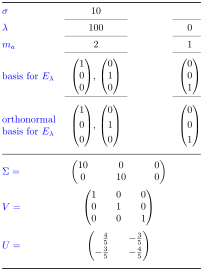

In [72]:
A =[8 -6 0; -6 -8 0]
nM.show_svd_table(A, Ascale=1, mmS=7, mmLambda=10, tmp_dir="../../tmp")

L"$\left(\begin{array}{rrr}
2 & 0 & -1 \\
1 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}\right) = \left(\begin{array}{rrr}
1 & -1 & -1 \\
-1 & 2 & -1 \\
1 & -1 & 0 \\
\end{array}\right) \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2 \\
\end{array}\right) \left(\begin{array}{rrr}
-1 & 1 & 3 \\
-1 & 1 & 2 \\
-1 & 0 & 1 \\
\end{array}\right)$
"

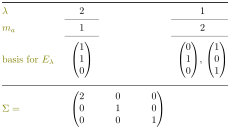

In [73]:
S,Λ,Sinv,A=gen_eigenproblem([1,1,2])
display(l_show( A, " = ", S, Λ, Sinv))
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

L"$A = \frac{1}{169} \left(\begin{array}{rrr}
153 & 48 & 12 \\
48 & 25 & -36 \\
12 & -36 & 160 \\
\end{array}\right) ,\quad S = \frac{1}{13} \left(\begin{array}{rrr}
3 & 12 & -4 \\
4 & 3 & 12 \\
-12 & 4 & 3 \\
\end{array}\right) , \quad \Lambda = \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}\right)$
"

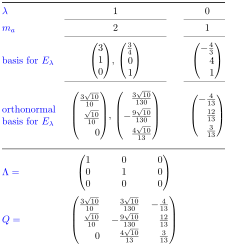

In [74]:
S,Λ,A=gen_symmetric_eigenproblem([1,1,0], maxint=2)
d,A_=factor_out_denominator(A)
#dS,S_=factor_out_denominator(S)
display(l_show(L"A = ", A, L",\quad S = ", S, L", \quad \Lambda = ", Λ))

nM.show_eig_tbl(A_,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp")

L"$\text{A = } \left(\begin{array}{rrr}
15 & 7 & 2 \\
11 & 7 & 2 \\
-123 & -63 & -18 \\
\end{array}\right) \text{ rref(A-2I) = } \frac{1}{3} \left(\begin{array}{rrr}
3 & 0 & 1 \\
0 & 3 & -1 \\
0 & 0 & 0 \\
\end{array}\right)$
"

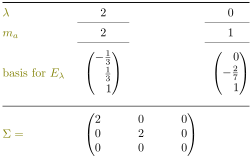

In [75]:
A=Rational{Int64}.(gen_non_diagonalizable_eigenproblem(2,0))
display(l_show("A = ", A, " rref(A-2I) = ", rref(A-2I) ))
nM.show_eig_tbl(Int.(A),fig_scale=1.2, mmLambda=11, color="Olive", tmp_dir="../../tmp" )

L"$\text{A = } \frac{1}{35} \left(\begin{array}{rrrr}
0 & 0 & 84 & 0 \\
0 & 0 & 63 & 0 \\
-20 & -60 & 0 & 30 \\
\end{array}\right) = \frac{1}{5} \left(\begin{array}{rrr}
0 & 4 & 3 \\
0 & 3 & -4 \\
5 & 0 & 0 \\
\end{array}\right) \left(\begin{array}{rrrr}
2 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{array}\right) \frac{1}{7} \left(\begin{array}{rrrr}
-2 & -6 & 0 & 3 \\
0 & 0 & 7 & 0 \\
6 & -3 & 0 & -2 \\
3 & 2 & 0 & 6 \\
\end{array}\right)$
"

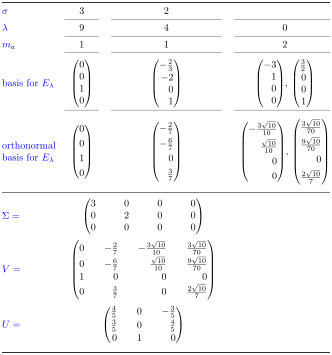

In [76]:
U,Σ,Vt,A = gen_svd_problem(3,4, [2,3],  maxint=2)
dA,intA=factor_out_denominator(A)
dU,intU=factor_out_denominator(U)
dVt,intVt=factor_out_denominator(Vt)

display( l_show( "A = ",A, " = ",U,Σ,Vt))

nM.show_svd_table(intA, Ascale=dA, mmS=7, mmLambda=10, tmp_dir="../../tmp")

# 5. WORK

### GE/GJ

In [77]:
#Random.seed!(284);
M=3; N=5; r=3
A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=true, num_rhs=M, has_zeros=false)
#A[2,:]=2A[1,:]; B[2,:]=2B[1,:]

pb = ShowGe{Rational{Int}}( A,  Matrix(1I(M)), tmp_dir="../../tmp")
#pb = ShowGe{Rational{Int}}( A,  B[:,1], tmp_dir="../../tmp")

#show_system( pb, b_col=2 )
#println(L_show("A = ", A, L"\quad b = ", B[:,1]))

print(L_show(L"A =", A)) #, L"\quad b = ", B)

$A = \left(\begin{array}{rrrrr}
-1 & -1 & 2 & 0 & -2 \\
0 & 0 & -1 & -2 & -2 \\
2 & 2 & -5 & -3 & 0 \\
\end{array}\right)$


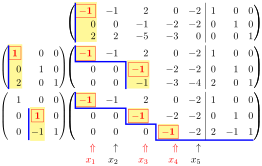

In [78]:
ref!(pb, gj=true)
show_layout!(pb)

In [79]:
show_backsubstitution!(pb, b_col=3)

/opt/ea42gh/la_figures/la_figures/_sympy_utils.py:130: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sym.Matrix(jl_list)


LoadError: Python: AttributeError: 'Tuple' object has no attribute 'equals'
[0mPython stacktrace:
[0m [1] [0m[1m_find_reasonable_pivot[22m
[90m   @ [39m[32msympy.matrices.determinant [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/determinant.py:104[39m
[0m [2] [0m[1m_row_reduce_list[22m
[90m   @ [39m[32msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:68[39m
[0m [3] [0m[1m_row_reduce[22m
[90m   @ [39m[32msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:127[39m
[0m [4] [0m[1m_rref[22m
[90m   @ [39m[32msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:381[39m
[0m [5] [0m[1mrref[22m
[90m   @ [39m[32msympy.matrices.matrixbase [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/matrixbase.py:3139[39m
[0m [6] [0m[1m_backsub_trace_from_ref[22m
[90m   @ [39m[33mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:99[39m
[0m [7] [0m[1mbacksubstitution_tex[22m
[90m   @ [39m[33mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:149[39m

In [80]:
show_solution!(pb, b_col=3)

LoadError: Python: AttributeError: 'Tuple' object has no attribute 'equals'
[0mPython stacktrace:
[0m [1] [0m[1m_find_reasonable_pivot[22m
[90m   @ [39m[33msympy.matrices.determinant [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/determinant.py:104[39m
[0m [2] [0m[1m_row_reduce_list[22m
[90m   @ [39m[33msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:68[39m
[0m [3] [0m[1m_row_reduce[22m
[90m   @ [39m[33msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:127[39m
[0m [4] [0m[1m_rref[22m
[90m   @ [39m[33msympy.matrices.reductions [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/reductions.py:381[39m
[0m [5] [0m[1mrref[22m
[90m   @ [39m[33msympy.matrices.matrixbase [39m[90m/usr/local/lib/python3.11/site-packages/sympy/matrices/matrixbase.py:3139[39m
[0m [6] [0m[1mstandard_solution_tex[22m
[90m   @ [39m[35mla_figures.backsub [39m[90m/opt/ea42gh/la_figures/la_figures/backsub.py:224[39m

In [81]:
# we can compute solution matrices rather than a layout
Xp, Xh = solutions(pb)
l_show( L"x_p =", Xp, L"\quad  x_h =", Xh)

L"$x_p = \left(\begin{array}{rrr}
7 & -6 & 4 \\
0 & 0 & 0 \\
4 & -3 & 2 \\
-2 & 1 & -1 \\
0 & 0 & 0 \\
\end{array}\right) \quad  x_h = \left(\begin{array}{rr}
-1 & 2 \\
1 & 0 \\
0 & 2 \\
0 & -2 \\
0 & 1 \\
\end{array}\right)$
"

In [82]:
#println(l_show(B[:,1]))
#println(l_show(B[:,2]))

#### 6x6 Example

In [83]:
if true
    M=6;N=6;r=3
    A=[0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  0   0
       0  0   0   0  1   1
       0  0   0   0  1   2
      -3  3  -9  -6  8  -7]
    A    = Rational{Int}.([A I])
    Nrhs = M
elseif false
    M=3; N=6; r=3
    A=[2 -1 -2  1  0 -2;
       4 -2 -4  2 -2 -3;
      -4  2  4 -2  0  4]
    A    = Rational{Int}.([A I])
    Nrhs = M
else
    M=3; N=6; r=3
    A=[0I(M) zeros(Int,M,N-M)]; A[2,3]=2
    A    = Rational{Int}.([A I])
    Nrhs = M
end

matrices, pivot_cols, desc= reduce_to_ref( A; n=N, gj=true );
pivot_list, bg_for_entries, ref_path_list, variable_summary = decorate_ge(desc, pivot_cols, (M,N));

println("number of layers: $(length(matrices))")
display(latexify((to_latex(matrices[end][end]))))


println( "num_levels = $(length(matrices))")
for k in desc println( k ) end
if false
    println("===================================")
    println("pivot_list")
    for k in pivot_list println(".  $k") end
end
if true
    println("===================================")
    println("bg_list")
    for k in bg_for_entries println(".  $k") end
end
if false
    println("===================================")
    println("ref_path_list")
    for k in ref_path_list println(".  $k") end
end

number of layers: 7


LoadError: You are trying to create LaTeX maths from a `String` that cannot be parsed as an expression: `\frac{23}{3}`.
`latexify` will, by default, try to parse any string inputs into expressions and this parsing has just failed.
If you are passing strings that you want returned verbatim as part of your input, try making them `LaTeXString`s first.
If you are trying to make a table with plain text entries, try passing the keyword argument `latex=false`.
You should also ensure that you have chosen an output environment that is capable of displaying non-maths objects.
Try for example `env=:table` for a LaTeX table or `env=:mdtable` for a markdown table.


In [84]:
h,m = nM.ge(to_latex(matrices), formater=x->x, Nrhs=Nrhs, tmp_dir="../../tmp",
            pivot_list      = pivot_list,
            ref_path_list   = ref_path_list,
            bg_for_entries  = bg_for_entries,
            array_names     = [ "E", ["A", "I"]],
            variable_summary = variable_summary,
    fig_scale=0.7
)
h

LoadError: Python: RenderError: Toolchain execution failed.
Artifacts kept at: ../../tmp.
See stderr at: ../../tmp/output.stderr.txt
Last returncode: 12.
---- stderr tail ----
Latexmk: If appropriate, the -f option can be used to get latexmk
  to try to force complete processing.


---- latex log tail ----
 pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


! Package pgf Error: No shape named `0-0' is known.

See the pgf package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.115 }
       %%
(That was another \errmessage.)


Overfull \hbox (15.0pt too wide) in paragraph at lines 56--117
[]$[]$ 
 []

[1

{/var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map}] (./output.aux)

LaTeX Warning: Label(s) may have changed. Rerun to get cross-references right.

 ) 
Here is how much of TeX's memory you used:
 17678 strings out of 477975
 399182 string characters out of 5839281
 1938330 words of memory out of 5000000
 37572 multiletter control sequences out of 15000+600000
 512741 words of font info for 34 fonts, out of 8000000 for 9000
 59 hyphenation exceptions out of 8191
 77i,17n,83p,673b,1009s stack positions out of 10000i,1000n,20000p,200000b,200000s
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmex10.pfb></us
r/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb></usr/shar
e/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb></usr/share/texli
ve/texmf-dist/fonts/type1/public/amsfonts/cm/cmsy10.pfb>
Output written on output.pdf (1 page, 43753 bytes).
PDF statistics:
 31 PDF objects out of 1000 (max. 8388607)
 19 compressed objects within 1 object stream
 0 named destinations out of 1000 (max. 500000)
 13 words of extra memory for PDF output out of 10000 (max. 10000000)


[0mPython stacktrace:
[0m [1] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[36mjupyter_tikz.executor [39m[90m/opt/ea42gh/jupyter-tikz/jupyter_tikz/executor.py:341[39m
[0m [2] [0m[1mrender_svg_with_artifacts[22m
[90m   @ [39m[32mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:71[39m
[0m [3] [0m[1mrender_svg[22m
[90m   @ [39m[32mmatrixlayout.render [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/render.py:108[39m
[0m [4] [0m[1mgrid_svg[22m
[90m   @ [39m[32mmatrixlayout.ge [39m[90m/opt/ea42gh/matrixlayout/matrixlayout/ge.py:2965[39m
[0m [5] [0m[1mge[22m
[90m   @ [39m[33mla_figures.ge_convenience [39m[90m/opt/ea42gh/la_figures/la_figures/ge_convenience.py:1030[39m

#### Inverse

In [85]:
A, A_inv                = gen_inv_pb(5, maxint=9)
A[3,:]=A[1,:]+3A[2,:]
l_show("A = ", A, L"\quad A^{-1} = ", A_inv)

L"$\text{A = } \left(\begin{array}{rrrrr}
1 & -9 & 7 & 8 & -6 \\
-4 & 37 & -34 & -37 & 28 \\
-11 & 102 & -95 & -103 & 78 \\
-9 & 88 & -114 & -106 & 155 \\
-8 & 74 & -66 & -66 & -25 \\
\end{array}\right) \quad A^{-1} = \left(\begin{array}{rrrrr}
2850 & 87562 & -50606 & -5475 & 689 \\
371 & 11435 & -6609 & -715 & 90 \\
38 & 1151 & -665 & -72 & 9 \\
31 & 1008 & -583 & -63 & 8 \\
4 & 128 & -74 & -8 & 1 \\
\end{array}\right)$
"

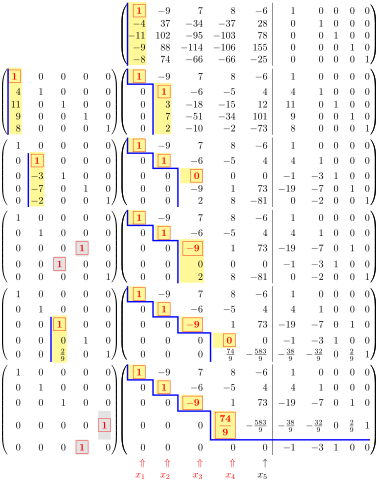

In [86]:
pb = ShowGe{Rational{Int}}( A,  Matrix(1I(size(A,1))), tmp_dir="../../tmp")
ref!(pb, gj=true)
show_layout!(pb)

### QR

In [87]:
Random.seed!(232);
A = gen_qr_problem_4(maxint=1)
A = A[:,1:3]
print(latexify(A[:,1:3]))
l_show("A=",A)

\begin{equation}
\left[
\begin{array}{ccc}
7 & -4 & -3 \\
-4 & -7 & 15 \\
4 & 0 & 0 \\
0 & 4 & 3 \\
\end{array}
\right]
\end{equation}


L"$\text{A=} \left(\begin{array}{rrr}
7 & -4 & -3 \\
-4 & -7 & 15 \\
4 & 0 & 0 \\
0 & 4 & 3 \\
\end{array}\right)$
"

In [88]:
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, fig_scale=1, tmp_dir="../../tmp")
h

Python: '<'

In [89]:
#print(latexify(A[:,1:3]))
B = Rational{Int}.(A)
Q = W//9
R = W'B//9

3×3 Matrix{Rational{Int64}}:
 9  0  -9
 0  9  -9
 0  0   9

In [90]:
l_show( "trace", L" (Q Q^t) =", tr(Q*Q'))

L"$\text{trace} (Q Q^t) = 3$
"

### Eigenproblems

#### General Case

In [91]:
S,Λ,Sinv,A = gen_eigenproblem([2,-1,-1])
d,intA     = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A = \left(\begin{array}{rrr}
-67 & -27 & -15 \\
132 & 53 & 30 \\
66 & 27 & 14 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 3*λ + 2$
"

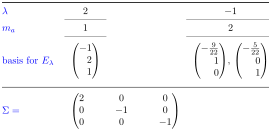

In [92]:
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Complex Case

In [93]:
S,Λ,S_inv, A = gen_cx_eigenproblem( [-1+2im])
d,intA       = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A = \left(\begin{array}{rr}
1 & -2 \\
4 & -3 \\
\end{array}\right) \quad p(\lambda) = λ^2 + 2*λ + 5$
"

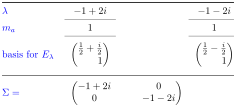

In [94]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Symmetric Case

In [95]:
#_,A = gen_gj_matrix(3,3,3)
W = gram_schmidt_w(A)//1
B=W*Diagonal([2,1,1])*inv(W)
l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A)),\qquad B=", 6B )
print(L_show(B))

LoadError: DimensionMismatch: second dimension of A, 2, does not match first dimension of B, 3

In [96]:
nM.show_eig_tbl(Int.(6B),Ascale=1, fig_scale=1, tmp_dir="../../tmp" )

LoadError: Python: ValueError: eig_tbl_spec requires a square matrix; got shape (4, 3)
[0mPython stacktrace:
[0m [1] [0m[1meig_tbl_spec[22m
[90m   @ [39m[33mla_figures.eig [39m[90m/opt/ea42gh/la_figures/la_figures/eig.py:86[39m
[0m [2] [0m[1meig_tbl_svg[22m
[90m   @ [39m[33mla_figures.convenience [39m[90m/opt/ea42gh/la_figures/la_figures/convenience.py:126[39m

In [97]:
#Random.seed!(243);
S,Λ,A   = gen_symmetric_eigenproblem([2,-1,-1], maxint=2)
l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A = \left(\begin{array}{rrr}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 2 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 3*λ + 2$
"

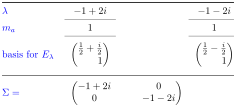

In [98]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Non-diagonalizable Matrix

In [99]:
A       = gen_non_diagonalizable_eigenproblem(2,0)
d,intA  = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A = \left(\begin{array}{rrr}
108 & -29 & 10 \\
468 & -126 & 44 \\
216 & -59 & 22 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 4*λ^2 - 4*λ$
"

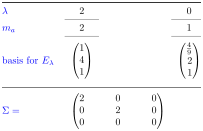

In [100]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### Orthonormal Decomposition

In [101]:
#Random.seed!(2883);
S,Λ,A   = gen_symmetric_eigenproblem([2,0,3], maxint=2)
d,intA  = factor_out_denominator(A)

l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$A = \frac{1}{7} \left(\begin{array}{rrr}
18 & 0 & 6 \\
0 & 12 & -6 \\
6 & -6 & 5 \\
\end{array}\right) \quad p(\lambda) = -λ^3 + 5*λ^2 - 6*λ$
"

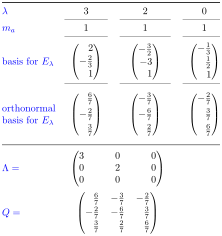

In [102]:
nM.show_eig_tbl(intA,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue", tmp_dir="../../tmp" )

#### SVD

In [103]:
Random.seed!(273);
U,Σ,Vt,A = gen_svd_problem(3,[3,2],  [2,2],  maxint=2)
dA,intA=factor_out_denominator(A)
dU,intU=factor_out_denominator(U)
dVt,intVt=factor_out_denominator(Vt)

l_show("A =", A, " = ", U, Σ, Vt)

L"$\text{A =} \frac{1}{35} \left(\begin{array}{rrrrr}
12 & 0 & 18 & -36 & 0 \\
0 & 42 & 0 & 0 & -56 \\
16 & 0 & 24 & -48 & 0 \\
\end{array}\right) = \frac{1}{5} \left(\begin{array}{rrr}
3 & 0 & -4 \\
0 & 5 & 0 \\
4 & 0 & 3 \\
\end{array}\right) \left(\begin{array}{rrrrr}
2 & 0 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}\right) \frac{1}{35} \left(\begin{array}{rrrrr}
10 & 0 & 15 & -30 & 0 \\
0 & 21 & 0 & 0 & -28 \\
0 & 28 & 0 & 0 & 21 \\
15 & 0 & -30 & -10 & 0 \\
-30 & 0 & -10 & -15 & 0 \\
\end{array}\right)$
"

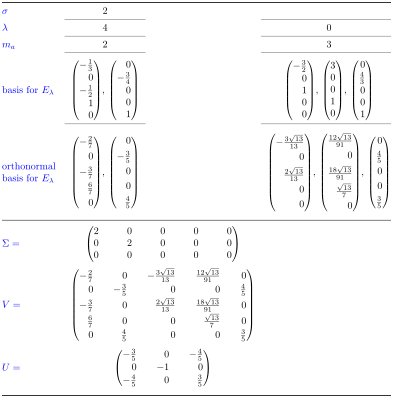

In [104]:
nM.show_svd_table(A, Ascale=1, mmS=7, mmLambda=10, tmp_dir="../../tmp")

In [105]:
#A,X,B = gen_gj_pb(3,2,2; maxint=2, pivot_in_first_col=false, num_rhs=1,has_zeros=false)
println(L_show( "A = ", A, L", \qquad b=", B+[1;0;-1]))

LoadError: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(4), Base.OneTo(3)), b has dims (Base.OneTo(3),), mismatch at 1

In [106]:
l_show( "A = ", A, L", \qquad b=", B+[1;0;-1])

LoadError: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(4), Base.OneTo(3)), b has dims (Base.OneTo(3),), mismatch at 1

In [107]:
rref([A'A A'B])

LoadError: DimensionMismatch: matrix A has dimensions (5,3), matrix B has dimensions (4,3)

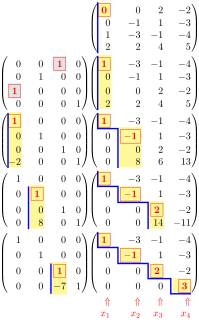

In [108]:
M=4; N=4; r=4
pivot_cols,P,L,U,A        = gen_plu_pb(M,N,r; has_zeros=true)

pb = ShowGe{Rational{Int}}( A, tmp_dir="../../tmp")
ref!(pb)
#show_system( pb, b_col=2 )
show_layout!(pb)

In [109]:
U,Σ,Vt,A = gen_svd_problem(2,2,  [1,2],  maxint=2)

l_show("A =", A, " = ", U, Σ, Vt)

L"$\text{A =} \frac{1}{25} \left(\begin{array}{rr}
12 & 41 \\
34 & 12 \\
\end{array}\right) = \frac{1}{5} \left(\begin{array}{rr}
3 & 4 \\
-4 & 3 \\
\end{array}\right) \left(\begin{array}{rr}
1 & 0 \\
0 & 2 \\
\end{array}\right) \frac{1}{5} \left(\begin{array}{rr}
-4 & 3 \\
3 & 4 \\
\end{array}\right)$
"

In [110]:
U,Σ,Vt,A = gen_svd_problem(2,3,  [1,2],  maxint=2)

l_show("A =", A, " = ", U, Σ, Vt)

L"$\text{A =} \frac{1}{25} \left(\begin{array}{rrr}
40 & 9 & 12 \\
30 & -12 & -16 \\
\end{array}\right) = \frac{1}{5} \left(\begin{array}{rr}
3 & 4 \\
-4 & 3 \\
\end{array}\right) \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 2 & 0 \\
\end{array}\right) \frac{1}{5} \left(\begin{array}{rrr}
0 & 3 & 4 \\
5 & 0 & 0 \\
0 & -4 & 3 \\
\end{array}\right)$
"

In [111]:
l_show(A'A)

L"$\frac{1}{25} \left(\begin{array}{rrr}
100 & 0 & 0 \\
0 & 9 & 12 \\
0 & 12 & 16 \\
\end{array}\right)$
"

L"$p(\lambda) = -λ^3 + 5*λ^2 - 7*λ + 3$
"

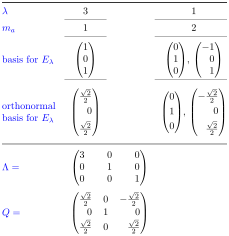

In [112]:
A=[2 0 1; 0 1 0; 1 0 2]
display(l_show( L"p(\lambda) = %$(charpoly(A))" ))
nM.show_eig_tbl(A,Ascale=1,normal=true, fig_scale=1, tmp_dir="../../tmp" )

key:
* eigvals  (3,1,1)        3
* eigvec                  1, 2
* orthog                  2
* statement A=,Λ Q        2